### Naƒçteme pot≈ôebn√© knihovny

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


### a) Konjugovan√© apriorn√≠ a aposteriorn√≠ rozdƒõlen√≠, prediktivn√≠ rozdƒõlen√≠

In [2]:
# Load the Excel file into a Pandas DataFrame
df = pd.read_excel('Projekt-2_Data.xlsx', nrows=100)

uloha_1_column = df['uloha_1 a)']

uloha_1_column

0     2
1     2
2     1
3     3
4     0
     ..
95    3
96    0
97    3
98    1
99    1
Name: uloha_1 a), Length: 100, dtype: int64

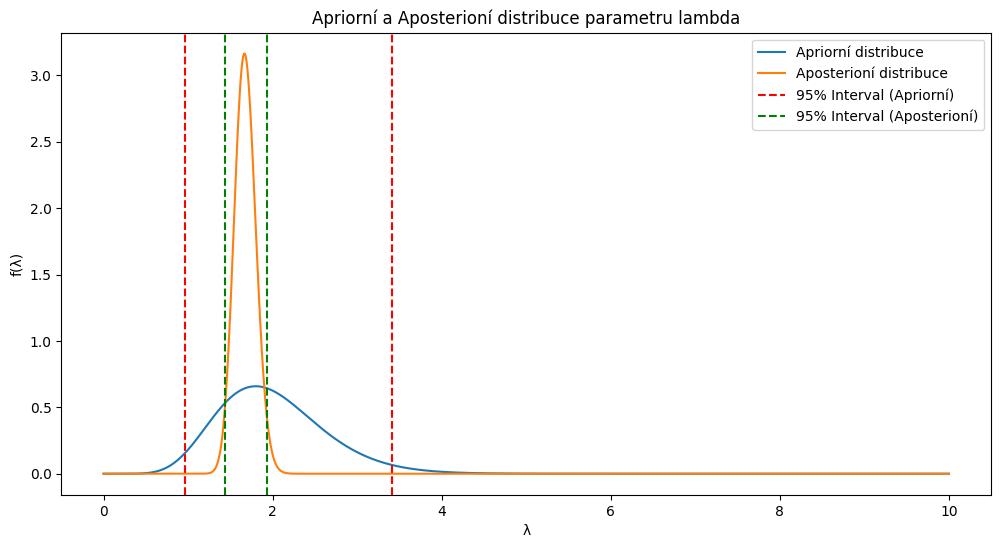

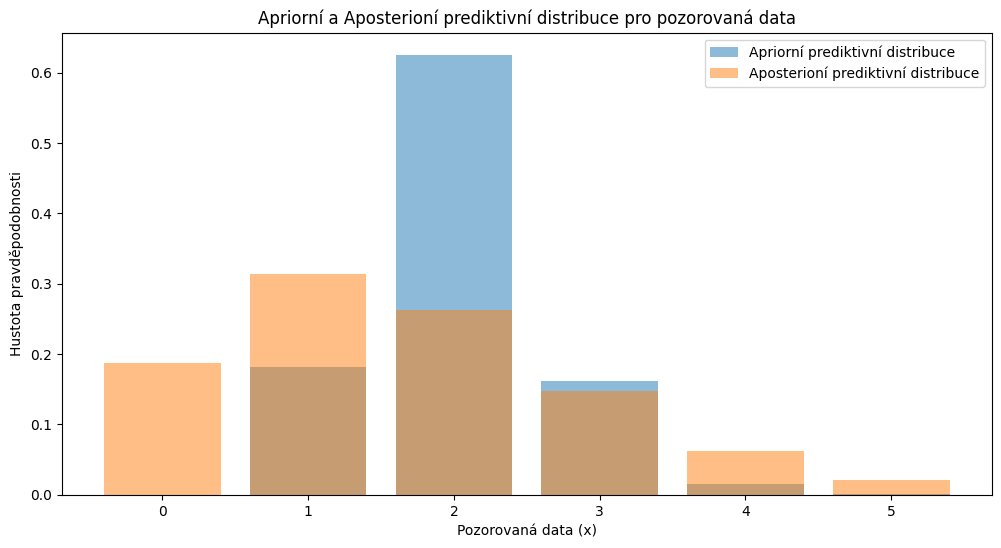

In [3]:
alpha_prior = 10

beta_prior = 5

prior_distribution = stats.gamma(alpha_prior, scale=1/beta_prior)

# Vƒõrohodnostn√≠ funkce (Poisson)
likelihood_function = lambda x, lambda_param: stats.poisson.pmf(x, lambda_param)

# Bayesovsk√Ω v√Ωpoƒçet - Aposterion√≠ distribuce
alpha_posterior = alpha_prior + uloha_1_column.sum() # a' = a + sum(x_i)
beta_posterior = beta_prior + len(uloha_1_column) # b' = b + n
posterior_distribution = stats.gamma(alpha_posterior, scale=1/beta_posterior)

# V√Ωpoƒçet kvantil≈Ø pro interval spolehlivosti
lower_bound_prior, upper_bound_prior = stats.gamma.interval(0.95, alpha_prior, scale=1/beta_prior)
lower_bound_posterior, upper_bound_posterior = stats.gamma.interval(0.95, alpha_posterior, scale=1/beta_posterior)


# Vykreslen√≠ v√Ωsledk≈Ø
x_values = np.linspace(0, 10, 1000)

# Apriorn√≠ a aposteriorn√≠ distribuce parametru lambda
plt.figure(figsize=(12, 6))
plt.plot(x_values, prior_distribution.pdf(x_values), label='Apriorn√≠ distribuce')
plt.plot(x_values, posterior_distribution.pdf(x_values), label='Aposterion√≠ distribuce')
plt.axvline(lower_bound_prior, linestyle='--', color='red', label='95% Interval (Apriorn√≠)')
plt.axvline(upper_bound_prior, linestyle='--', color='red')
plt.axvline(lower_bound_posterior, linestyle='--', color='green', label='95% Interval (Aposterion√≠)')
plt.axvline(upper_bound_posterior, linestyle='--', color='green')
plt.title('Apriorn√≠ a Aposterion√≠ distribuce parametru lambda')
plt.xlabel('Œª')
plt.ylabel('f(Œª)')
plt.legend()
plt.show()

# Apriorn√≠ a aposteriorn√≠ prediktivn√≠ distribuce pro pozorovan√° data
plt.figure(figsize=(12, 6))
x_values_data = np.arange(0, max(uloha_1_column) + 1)
plt.bar(x_values_data, prior_distribution.pdf(x_values_data), alpha=0.5, label='Apriorn√≠ prediktivn√≠ distribuce')
plt.bar(x_values_data, likelihood_function(x_values_data, alpha_posterior/beta_posterior), alpha=0.5, label='Aposterion√≠ prediktivn√≠ distribuce')
plt.title('Apriorn√≠ a Aposterion√≠ prediktivn√≠ distribuce pro pozorovan√° data')
plt.xlabel('Pozorovan√° data (x)')
plt.ylabel('Hustota pravdƒõpodobnosti')
plt.legend()
plt.show()


In [4]:
lower_bound_prior, upper_bound_prior = stats.gamma.interval(0.95, alpha_prior, scale=1/beta_prior)
lower_bound_posterior, upper_bound_posterior = stats.gamma.interval(0.95, alpha_posterior, scale=1/beta_posterior)

print(f"95% Interval spolehlivosti (Apriorn√≠): ({lower_bound_prior}, {upper_bound_prior})")
print(f"95% Interval spolehlivosti (Aposterion√≠): ({lower_bound_posterior}, {upper_bound_posterior})\n")

mean_posterior = alpha_posterior / beta_posterior
median_posterior = (alpha_posterior - 1/3) / beta_posterior

print("Aposterion√≠ bodov√© odhady parametru ùúÜ:")
print(f"St≈ôedn√≠ hodnota: {mean_posterior}")
print(f"Medi√°n: {median_posterior}")

# Bodov√© odhady poƒçtu pozorovan√≠
mean_prior_observed = alpha_prior / beta_prior
mean_posterior_observed = alpha_posterior / beta_posterior

print("\nApriorn√≠ a aposterion√≠ bodov√© odhady poƒçtu pozorovan√≠:")
print(f"Apriorn√≠ st≈ôedn√≠ hodnota: {mean_prior_observed}")
print(f"Aposterion√≠ st≈ôedn√≠ hodnota: {mean_posterior_observed}")

95% Interval spolehlivosti (Apriorn√≠): (0.9590777392264868, 3.416960690283833)
95% Interval spolehlivosti (Aposterion√≠): (1.4376938284869922, 1.9327207471868797)

Aposterion√≠ bodov√© odhady parametru ùúÜ:
St≈ôedn√≠ hodnota: 1.6761904761904762
Medi√°n: 1.6730158730158728

Apriorn√≠ a aposterion√≠ bodov√© odhady poƒçtu pozorovan√≠:
Apriorn√≠ st≈ôedn√≠ hodnota: 2.0
Aposterion√≠ st≈ôedn√≠ hodnota: 1.6761904761904762


### b) Aproximace diskr√©tn√≠m rozdƒõlen√≠m

### Vƒõrohodnostn√≠ funkce

In [5]:
df = pd.read_excel('Projekt-2_Data.xlsx')

mean_value = 3
std_value = 1
a_value = 1

def calculate_cdf(b, mean, std):
    return stats.norm.cdf(b, loc=mean, scale=std) - stats.norm.cdf(a_value, loc=mean, scale=std)

def normal_dist(x , mean , sd):
    prob_density = (1/(np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

max_indices = df.groupby('skupina')['uloha_1 b)_prior'].idxmax()

# Select the corresponding rows from the original DataFrame
result_df = df.loc[max_indices]

b = np.linspace(min(result_df["uloha_1 b)_prior"]), max(result_df["uloha_1 b)_prior"]), 50)

observed_data = df['uloha_1 b)_pozorov√°n√≠'].head(100)

filtered_b = [value for value in b if all(a_value < i < value for i in observed_data)]

prob_density = []


for value in filtered_b:
    denominator = calculate_cdf(value, mean_value, std_value)
    # n√°soben√≠ 1/std_value je zbyteƒçn√©, proto≈æe 1/1 = 1
    sum_prob = 1
    for i in observed_data:
        sum_prob *= (normal_dist(i, mean_value, std_value) / denominator)
    prob_density.append(sum_prob)
    


sum_prob_density = sum(prob_density)
verohodnostni_funkce = [x / sum_prob_density for x in prob_density]

### Apriorn√≠ rozdƒõlen√≠

In [6]:
b = result_df["uloha_1 b)_prior"]

hist, bin_edges = np.histogram(b, bins=50, density=True)

# Normalizace histogramu
bin_widths = np.diff(bin_edges)
normalized_hist = hist * bin_widths

# Diskr√©tn√≠ apriorn√≠ rozdƒõlen√≠
b_values = (bin_edges[:-1] + bin_edges[1:]) / 2  # St≈ôedy interval≈Ø
apriorni_rozdeleni = normalized_hist / sum(normalized_hist)

### Aposteriorn√≠ rozdƒõlen√≠

In [7]:
prior_probs = apriorni_rozdeleni[-22:]
density_probs = prob_density

# Vƒõrohodnostn√≠ funkce P(X | theta) -
likelihood = density_probs

# Bayesova vƒõta
numerator = likelihood * prior_probs
aposteriorni_rozdeleni  = numerator / np.sum(numerator)

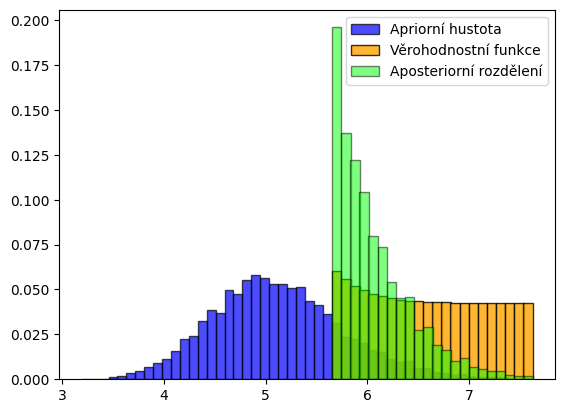

In [8]:
plt.bar(b_values, apriorni_rozdeleni, width=bin_widths, color='blue', alpha=0.7, label='Apriorn√≠ hustota', edgecolor='black')
plt.bar(filtered_b, verohodnostni_funkce, width=0.092, color='orange', alpha=0.8, label='Vƒõrohodnostn√≠ funkce', edgecolor='black')
plt.bar(filtered_b, aposteriorni_rozdeleni, width=0.092, color='lime', alpha=0.5, label='Aposteriorn√≠ rozdƒõlen√≠', edgecolor='black')
plt.legend()
plt.show()

In [9]:
cumulative_posterior = np.cumsum(aposteriorni_rozdeleni)

lower = np.argmax(cumulative_posterior >= 0.025)
upper = np.argmax(cumulative_posterior >= 0.975)

lower_bound_posterior = filtered_b[lower]
upper_bound_posterior = filtered_b[upper]

print(f"95% interval spolehlivosti: ({lower_bound_posterior}, {upper_bound_posterior})")

95% interval spolehlivosti: (5.6999748786593525, 7.042014266583222)


In [10]:
expected_value = np.sum(aposteriorni_rozdeleni * filtered_b)

modus = np.argmax(aposteriorni_rozdeleni)
map_value = filtered_b[modus]

print(f"Odhad st≈ôedn√≠ hodnoty: {expected_value}")
print(f"Odhad modu: {map_value}")

Odhad st≈ôedn√≠ hodnoty: 6.067086994212372
Odhad modu: 5.6999748786593525


### √öloha 2

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('Projekt-2_Data.xlsx', sheet_name='√öloha 2')


data.rename(columns={'Ping [ms]': 'Ping'}, inplace=True)

data_encoded = pd.get_dummies(data, columns=['OSType'], drop_first=True, dtype=int)


# Aktualizovan√Ω vzorec s konkr√©tn√≠mi koeficienty

formula = "Ping ~ ActiveUsers + ScrollingPct + OSType_MacOS + OSType_Windows + OSType_iOS + I(ActiveUsers ** 2) + ActiveUsers*ScrollingPct + ActiveUsers*OSType_MacOS + ActiveUsers*OSType_Windows + ActiveUsers*OSType_iOS"

# Vytvo≈ôen√≠ a fitov√°n√≠ modelu
model = sm.OLS.from_formula(formula, data=data_encoded).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Ping   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     264.4
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.69e-190
Time:                        18:39:45   Log-Likelihood:                -1599.1
No. Observations:                 502   AIC:                             3220.
Df Residuals:                     491   BIC:                             3267.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [12]:
influence = model.get_influence()
cooks_distance = influence.cooks_distance[0]

# Indexy nejvƒõt≈°√≠ch Cookov√Ωch vzd√°lenost√≠
outliers_index = np.where(cooks_distance > 4 / data.shape[0])[0]

data.iloc[outliers_index]

OSType  ActiveUsers  InteractingPct  ScrollingPct  Ping
12   Windows         8990          0.9812        0.0188    55
35       iOS         9313          0.9674        0.0326    45
41   Android         1538          0.2466        0.7534    13
54       iOS         7957          0.0242        0.9758    35
113      iOS         2356          0.9780        0.0220    36
144      iOS         9516          0.5413        0.4587    60
145  Android         3421          0.8852        0.1148    37
166      iOS         2835          0.9138        0.0862    56
178  Windows         1207          0.0766        0.9234    33
255  Windows         5513          0.4912        0.5088    90
286      iOS         9227          0.2874        0.7126    60
331    MacOS         1207          0.9424        0.0576    35
332  Android         2588          0.7772        0.2228    56
340  Windows         9341          0.6410        0.3590    51
428    MacOS         2404          0.9432        0.0568    64
476    MacOS          153          0.2111        0.7889    61
490      iOS         8839          0.4492        0.5508    37

In [13]:
# Odstranƒõn√≠ extr√©mnƒõ odlehl√Ωch hodnot
data_no_outliers = data.drop(outliers_index, axis=0)
data_no_outliers

OSType  ActiveUsers  InteractingPct  ScrollingPct  Ping
0        iOS         4113          0.8283        0.1717    47
1        iOS         7549          0.3461        0.6539    46
2    Windows         8855          0.2178        0.7822    55
3    Android         8870          0.0794        0.9206    56
4      MacOS         9559          0.7282        0.2718    76
..       ...          ...             ...           ...   ...
497      iOS         5315          0.1974        0.8026    28
498    MacOS         1392          0.2373        0.7627    24
499      iOS         6014          0.8112        0.1888    54
500  Android         5118          0.2345        0.7655    39
501    MacOS         2660          0.9390        0.0610    55

[485 rows x 5 columns]

In [14]:
# Identifikace nejproblematiƒçtƒõj≈°√≠ch hodnot
problematic_values = data.loc[outliers_index, ['ActiveUsers', 'InteractingPct', 'ScrollingPct', 'OSType', 'Ping [ms]']]
print("Nejproblematiƒçtƒõj≈°√≠ hodnoty:")
print(problematic_values)

KeyError: "['Ping [ms]'] not in index"

In [ ]:
# P≈ô√≠klad s u≈æivatelem s Windows
user_windows = {'ActiveUsers': data['ActiveUsers'].mean(),
                'InteractingPct': data['InteractingPct'].mean(),
                'ScrollingPct': data['ScrollingPct'].mean(),
                'OSType': 'Windows'}

predicted_ping = model.predict(pd.DataFrame(user_windows, index=[0]))

ci = model.get_prediction(pd.DataFrame(user_windows, index=[0])).conf_int()
# Konfidenƒçn√≠ a predikƒçn√≠ intervaly
ci_df = pd.DataFrame(ci, columns=['lower', 'upper'])

# Konfidenƒçn√≠ a predikƒçn√≠ intervaly
pred_int_df = model.get_prediction(pd.DataFrame(user_windows, index=[0])).conf_int(obs=True)
print("Odhadnut√° hodnota odezvy:", predicted_ping[0])
print("Konfidenƒçn√≠ interval:", ci_df.iloc[0])
print("Predikƒçn√≠ interval:", pred_int_df[0])


Odhadnut√° hodnota odezvy: 52.295432410093895
Konfidenƒçn√≠ interval: lower    51.066410
upper    53.524455
Name: 0, dtype: float64
Predikƒçn√≠ interval: [39.56633982 65.024525  ]
